In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')

#import oviz
from oviz import Animate3D, Trace, TraceCollection

In [2]:
df = pd.DataFrame({'x' : [0, 20], 'y' : [0, 20], 'z' : [0, 20], 'U' : [0, 2], 'V' : [0, 2], 'W' : [0, 2], 'age_myr' : [100, 20], 'name' : ['test1', 'test2']})
test_trace = Trace(df = df, data_name = 'Test', min_size = 1, max_size = 10, color = 'violet', opacity = 1)
sc = TraceCollection([test_trace])

In [3]:
times = np.round(np.arange(-21., 21., 1), 1)
plot_3d = Animate3D(
    data_collection = sc, 
    xyz_widths = (501, 501, 300), 
    figure_theme = 'dark', 
    trace_grouping_dict=None)
fig3d = plot_3d.make_plot(
    time = times,
    show = False, 
    save_name ='/Users/cam/Downloads/oviz_test.html', 
    static_traces = None, 
    static_traces_times = None, 
    static_traces_legendonly=True,
    focus_group = None,
    fade_in_time = 5, # Myr,
    fade_in_and_out = False,
    show_gc_line = False
)

In [4]:
len(times)

42

In [5]:
# test integration
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib widget

In [6]:
s = SkyCoord(
    u = df['x'].values[0] * u.pc,
    v = df['y'].values[0] * u.pc,
    w = df['z'].values[0] * u.pc,
    U = df['U'].values[0] * u.km/u.s,
    V = df['V'].values[0] * u.km/u.s,
    W = df['W'].values[0] * u.km/u.s,
    frame = 'galactic',
    representation_type = 'cartesian',
    differential_type = 'cartesian'
)

#o.integrate(times*u.Myr, MWPotential2014)

In [7]:
# Check if times has both positive and negative components
if np.any(times < 0) and np.any(times > 0):
    t_neg = np.flip(times[times < 0])
    t_pos = times[times >= 0]

opos = Orbit(vxvv = s,  ro = 8., vo = 220.)
oneg = Orbit(vxvv = s,  ro = 8., vo = 220.)

In [8]:
t_neg

array([ -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20., -21.])

In [9]:
oneg.integrate(t_neg*u.Myr, MWPotential2014)
sneg = oneg.SkyCoord(t_neg*u.Myr)
opos.integrate(t_pos*u.Myr, MWPotential2014)
spos = opos.SkyCoord(t_pos*u.Myr)

# x = np.append(sneg.galactic.cartesian.x.to(u.pc).value, spos.galactic.cartesian.x.to(u.pc).value)
# y = np.append(sneg.galactic.cartesian.y.to(u.pc).value, spos.galactic.cartesian.y.to(u.pc).value)
x = sneg.galactic.cartesian.x.to(u.pc).value
y = sneg.galactic.cartesian.y.to(u.pc).value

In [10]:
x

array([ 4.96603330e-21, -8.17069442e+00, -1.00278449e+01, -5.59144412e+00,
        5.11240166e+00,  2.20516048e+01,  4.51882412e+01,  7.44787080e+01,
        1.09873892e+02,  1.51319346e+02,  1.98755476e+02,  2.52117732e+02,
        3.11336806e+02,  3.76338832e+02,  4.47045586e+02,  5.23374694e+02,
        6.05239833e+02,  6.92550934e+02,  7.85214380e+02,  8.83133205e+02,
        9.86207289e+02])

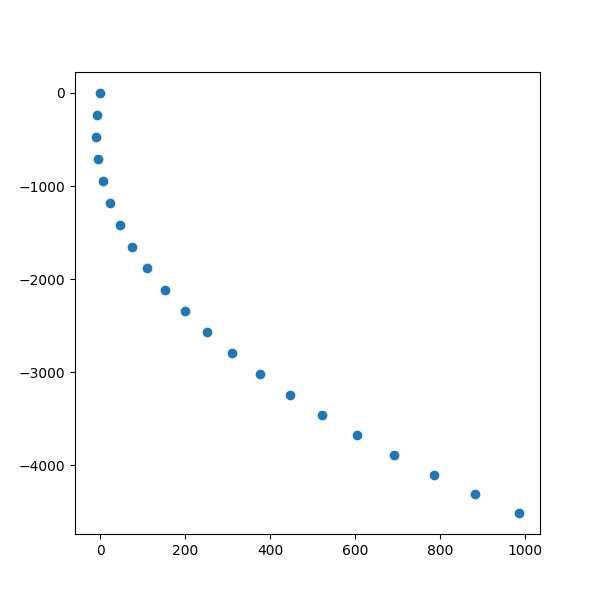

In [11]:

plt.figure(figsize = (6,6))
plt.scatter(x, y)
plt.show()

In [12]:
t_neg

array([ -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20., -21.])